In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load data from the StateDataReporter
log = pd.read_csv('../2-simulation/0/1ubq000.log', sep='\t')
print(log)

      #"Progress (%)"      Step      Time (ps)  Potential Energy (kJ/mole)  \
0                0.0%      1000       4.000000              -232996.789726   
1                0.0%      2000       8.000000              -229906.572100   
2                0.0%      3000      12.000000              -230648.844259   
3                0.0%      4000      16.000000              -230294.270365   
4                0.0%      5000      20.000000              -229235.903504   
...               ...       ...            ...                         ...   
24995          100.0%  24996000   99984.000019              -232868.060198   
24996          100.0%  24997000   99988.000019              -231578.028657   
24997          100.0%  24998000   99992.000019              -231151.160148   
24998          100.0%  24999000   99996.000019              -232360.208493   
24999          100.0%  25000000  100000.000019              -231583.622857   

       Kinetic Energy (kJ/mole)  Total Energy (kJ/mole)  Temper

# Over an MD simulation, observables usually change quickly to start and then stabilize

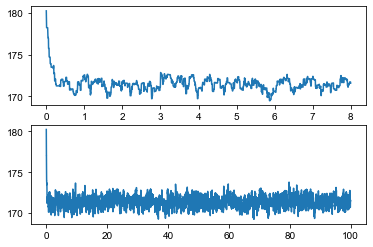

In [3]:
values = log['Box Volume (nm^3)'].to_numpy()
times = np.array(range(len(values)))*4/1000 # in ns
plt.subplot(2,1,1)
plt.plot(times[:2000], values[:2000])
plt.subplot(2,1,2)
plt.plot(times, values)

# Why is it important to discard equilibration?

In [4]:
# Select points to evaluate running averages
end_inds = np.linspace(0, len(log), 250, dtype=int)
times = end_inds*4/1000 # in ns

In [5]:
# Detect the equilibration time
import pymbar
(equil_ind, g, Neff_max) = pymbar.timeseries.detectEquilibration(log['Box Volume (nm^3)'].to_numpy(), nskip=5)
print(f'The equilibration time is {equil_ind} steps or {equil_ind*4/1000} ns, \n' + \
      f'statistical inefficiency is {g}, \n' + \
      f'and number of effective samples is {Neff_max}')

The equilibration time is 35 steps or 0.14 ns, 
statistical inefficiency is 45.51395034790039, 
and number of effective samples is 548.5350952148438


In [6]:
# Define functions to compute the running average and to show it with and without equilibration
def runningAverage(values, equil_ind, end_inds):
  """The running average of a time series
  
  Parameters
  ----------
  values : iterable object
  equil_ind : int
    index to start including in the running average
  end_inds : list of int
    indices at which the running average is evaluated
  """
  return [np.mean(values[equil_ind:end_ind]) \
    if end_ind>equil_ind else np.nan for end_ind in end_inds]

def compareRunningAverages(values, equil_ind):
  """Plots the running average with and without discarding the equilibration time.
  
  Parameters
  ----------
  values : iterable object
  equil_ind : int
    index to start including in the running average  
  """
  plt.plot(times, runningAverage(values, 0, end_inds))
  plt.plot(times, runningAverage(values, equil_ind, end_inds))
  plt.legend(['Full trajectory','Discarding equilibration'])

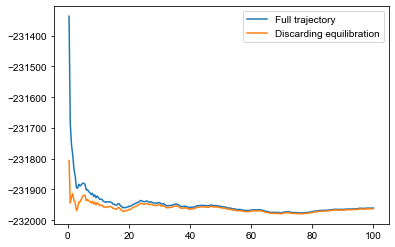

In [7]:
compareRunningAverages(log['Potential Energy (kJ/mole)'].to_numpy(), equil_ind)

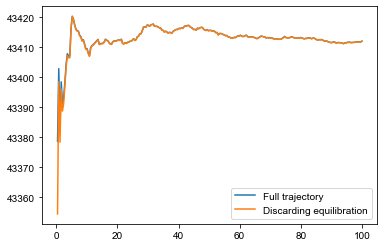

In [8]:
compareRunningAverages(log['Kinetic Energy (kJ/mole)'].to_numpy(), equil_ind)

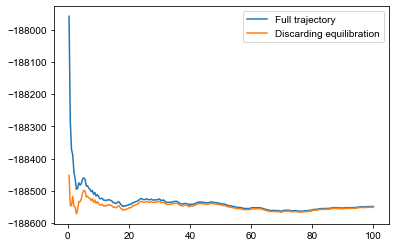

In [9]:
compareRunningAverages(log['Total Energy (kJ/mole)'].to_numpy(), equil_ind)

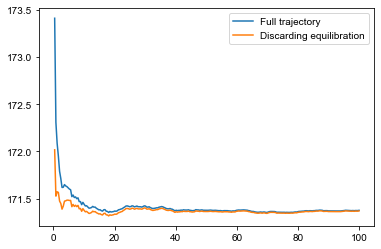

In [10]:
compareRunningAverages(log['Box Volume (nm^3)'].to_numpy(), equil_ind)

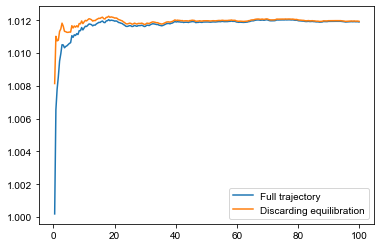

In [11]:
compareRunningAverages(log['Density (g/mL)'].to_numpy(), equil_ind)

For all of these observables, failure to discard the equilibration period leads to a biased estimate of the average. The bias diminishes with time.